# Exploring the Android App Market - a Data Mining Analysis of Google Playstore Applications 



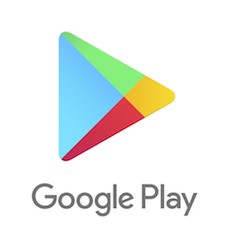

### SENG 474 Fall 2018 Data Mining Project

Cole Boothman St.ID V00808231 <br>
Amy Hanvoravongchai St.ID V00822271 <br>

### Contents

1. Introduction
2. Data Collection 
3. Data Preprocessing and Visualization
4. Data Mining
5. Conclusions
6. References

### 1. Introduction


Within the past 10 years, the market for mobile applications has grown tremendously. As the technology for smart phones and mobile applications has increased, so has the capabilities and complexity of our mobile applications. Consumers are now able to browse and download millions of applications available onto their phones from the Android and iPhone app stores, choosing from a large variety of applications spanning across social media, video gaming, utility, health technology and many more categories of mobile apps. 

The rapid rise of the mobile application market has increased the demand for software development to be more mobile oriented, from developing new mobile applications to making new web applications and websites user friendly for mobile users. This shift in application development accounts for tld consider he fact that mobile users surpassed the amount of desktop users in 2014 [1], and that in 2017 the estimated global application revenue for mobile applications was expected to be around 77 billion dollars [2].

Given the size and growth of the mobile market, companies who exist or wish to invest in the mobile application market may wish to conduct a thorough economic analysis of existing mobile applications. We can consider questions such as 'What makes an mobile application successful?', 'What do people have to say about mobile applications that are highly rated?' or 'What catergories of mobile applications have the most downloads?' as queries that might help us investigate how mobile applications become well known, acquire high ratings and profitable.

In this project, we analyze two datasets containing information on applications in the Android Google Play Store. The first dataset is the metadata of 10842 applications in the Google Play Store, containing the names, categories, downloads, number of reviews, and other data on each application. We conduct an analysis of the correlation between this metadata and popular applications in the Google Play Store, as well as the correlation for unpopular applications. The second dataset is a set of 64292 app reviews, in which we analyze commonly used words in positive and negative reviews, as well as present a model that can be used for predicting sentiment in app reviews.

### 2. Data Collection


For this project, we used the following dataset from Kaggle.com:

https://www.kaggle.com/lava18/google-play-store-apps

This dataset consists of two csv files, containing details and reviews of applications on the Google Play Store.

`googleplaystore.csv`

This csv file contains metata on 10842 applications in the Google Play Store. For each application, this includes: 

- App Name
- Category
- Number of Reviews
- Size
- Number of Installs
- Type (Free, Paid)
- Price
- Content Rating
- Genres
- Last Updated
- Current Version
- Android Versions supported

As an example, here is the first row in our file:




We will use this dataset to examine the correlations between successful apps and their various metatdata, as well as what makes an application *not* successful.

`googleplaystore_user_reviews.csv`

This csv file contains review details on 64292 apps on the Play Store. For each application, this includes:

- App Name
- Translated Review
- Sentiment
- Sentiment Polarity
- Sentiment Subjectivity

As an exmaple, here is the first row in our file:



We will use thie dataset to examine positive and negative reviews, and examine a model that makes predictions for new reviews based on this dataset.

References:

https://www.business2community.com/mobile-apps/2017-mobile-app-market-statistics-trends-analysis-01750346

### 3. Data Preprocessing and Visualization


Let's examine the data and do any preprocessing and cleanup that might be needed.


In [11]:
import pandas as pd

data = pd.read_csv('googleplaystore.csv')

print('The total number of applications in this dataset is: {}\n'.format(data.shape[0]))
data.head()


The total number of applications in this dataset is: 10841



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


There's a couple things that we can improve on our dataset for processing.

- Some columns have NaN as values. For example, Categories and Ratings contain this. Let's filter these results.
- The number of installs include the "+" character. We will remove these so we can use the number of installs as an float.
- The size category has the suffix 'M' for megabytes. We'll remove this so we can use the size as a float.
- Convert values to string or float values where necessary.